In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [28]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
red['type'] = 'red'
white['type'] = 'white'

In [29]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [30]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [31]:
df = pd.concat([red, white], ignore_index=True, axis=0)

In [32]:
columns = df.columns

In [33]:
columns = [column.replace(' ', '_') for column in columns]
df.columns = columns

In [34]:
df.shape

(6497, 13)

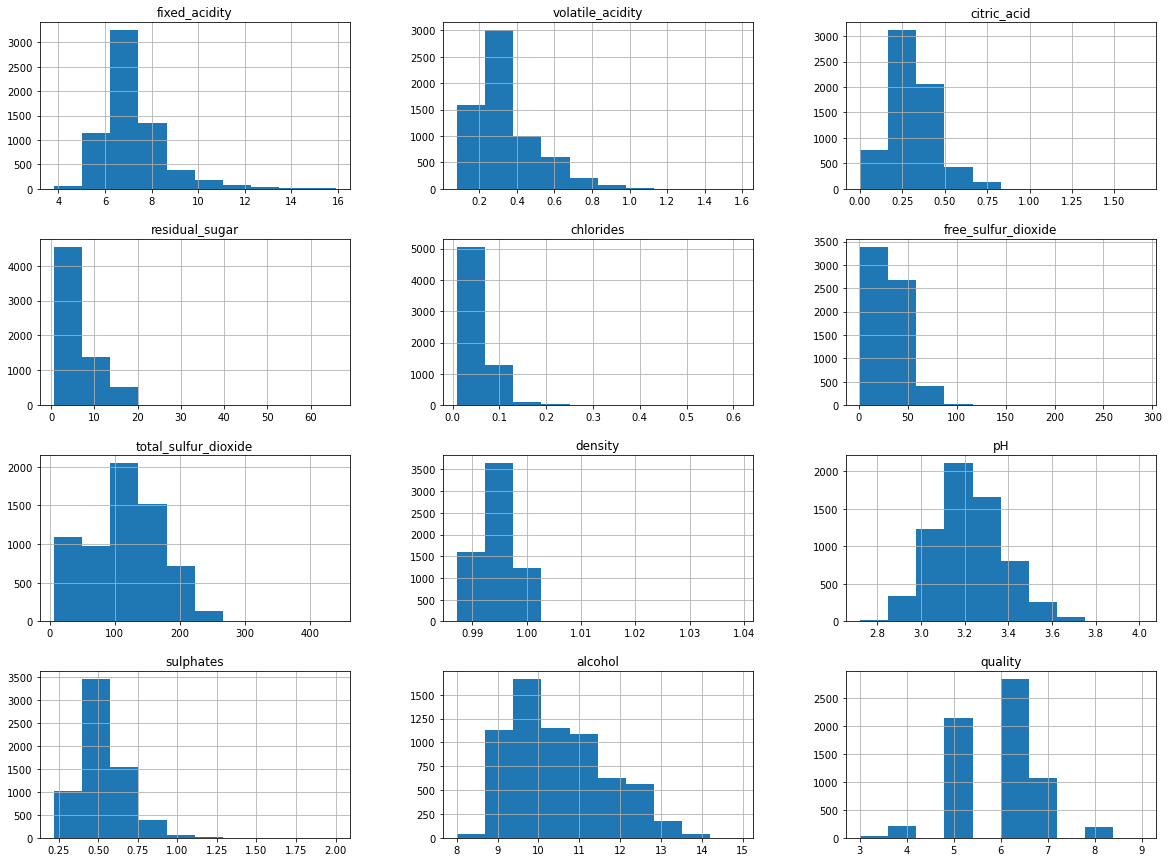

In [35]:
df.hist(figsize=(20, 15));

In [36]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [37]:
df.groupby('type')['type'].count()

type
red      1599
white    4898
Name: type, dtype: int64

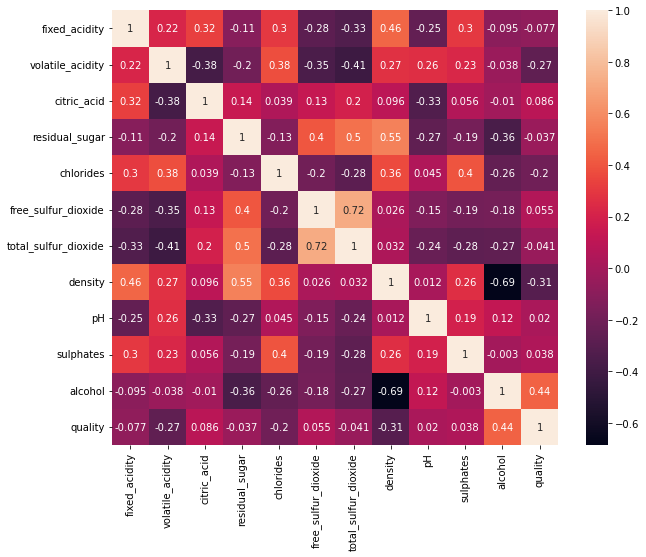

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat, annot=True)
plt.show()

In [39]:
df_by_type = df.groupby('type').mean().reset_index().transpose()

In [40]:
df_by_type

,0,1
type,red,white
fixed_acidity,8.319637,6.854788
volatile_acidity,0.527821,0.278241
citric_acid,0.270976,0.334192
residual_sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free_sulfur_dioxide,15.874922,35.308085
total_sulfur_dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267


In [41]:
df_by_type.columns=['red','white']

In [42]:
df_by_type.drop(index=df_by_type.index[0], axis=0, inplace=True)

In [43]:
df_by_type['red'] = pd.to_numeric(df_by_type['red'],errors='coerce')

In [44]:
df_by_type['white'] = pd.to_numeric(df_by_type['white'],errors='coerce')

In [45]:
df_by_type

,red,white
fixed_acidity,8.319637,6.854788
volatile_acidity,0.527821,0.278241
citric_acid,0.270976,0.334192
residual_sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free_sulfur_dioxide,15.874922,35.308085
total_sulfur_dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267
sulphates,0.658149,0.489847


In [46]:
df_by_type['diff_perc'] = (df_by_type['white'] - df_by_type['red']) / df_by_type['white'] *100

In [48]:
df_by_type.sort_values(by='diff_perc', ascending=False).style.bar(subset=['diff_perc'], align='mid', color=['#d65f5f', '#e2eba3'])

,red,white,diff_perc
total_sulfur_dioxide,46.467792,138.360657,66.415459
residual_sugar,2.538806,6.391415,60.277880
free_sulfur_dioxide,15.874922,35.308085,55.038848
citric_acid,0.270976,0.334192,18.916069
quality,5.636023,5.877909,4.115185
alcohol,10.422983,10.514267,0.868191
density,0.996747,0.994027,-0.273564
pH,3.311113,3.188267,-3.853083
fixed_acidity,8.319637,6.854788,-21.369730
sulphates,0.658149,0.489847,-34.358077


In [19]:
df[['red', 'white']] = pd.get_dummies(df['type'])
df.drop('type', axis=1, inplace=True)

In [20]:
df.isna().sum()

fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
red                      0
white                    0
dtype: int64

In [21]:
df= df.dropna()

In [22]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
white                   0
dtype: int64

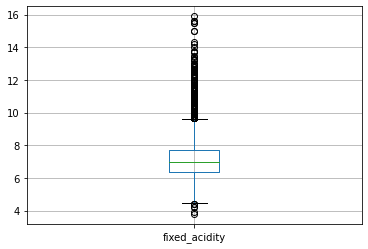

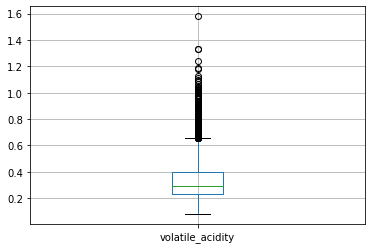

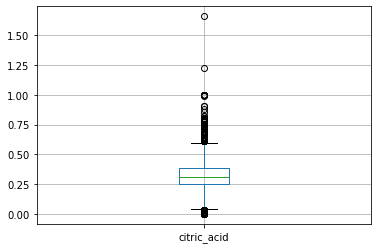

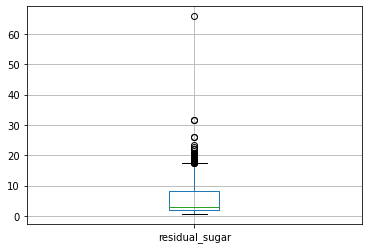

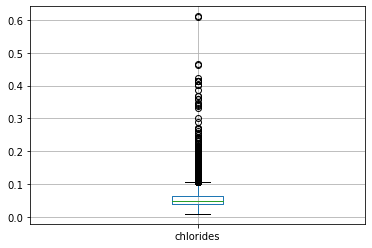

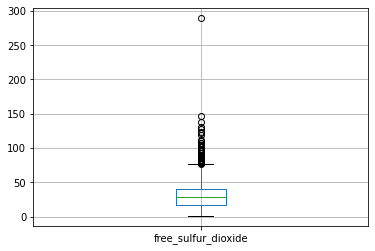

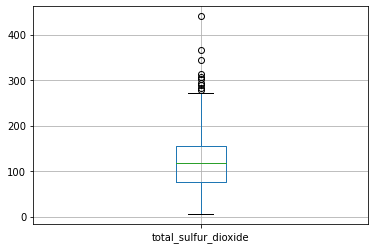

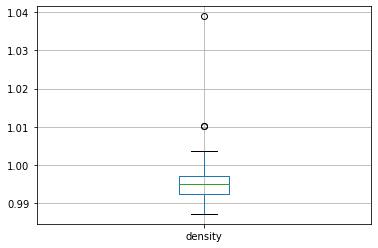

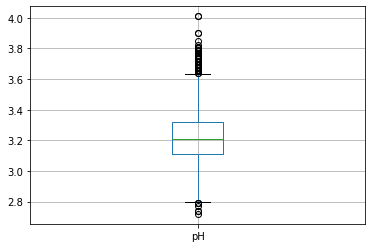

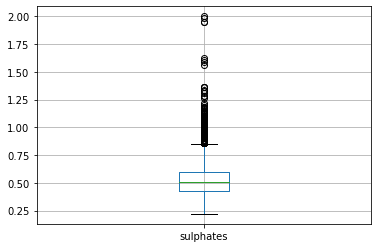

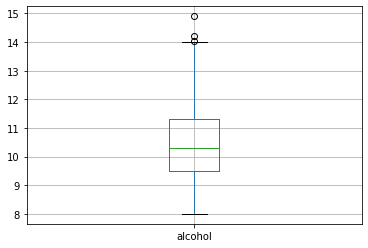

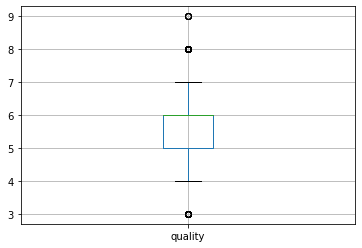

In [23]:
for column in df.loc[:, ~df.columns.isin(['red', 'white'])]:
    plt.figure()
    df.boxplot([column])

In [24]:
df.quality.value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [50]:
map = {3 : 'poor', 4 : 'poor', 5 : 'average', 6 : 'good', 7 :'good', 8 : 'good', 9 : 'good'}
df['quality'] = df['quality'].map(map)

In [51]:
df.quality.value_counts()

good       4113
average    2138
poor        246
Name: quality, dtype: int64

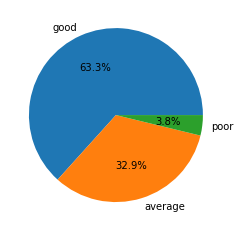

In [62]:
plt.pie(df.quality.value_counts(), labels = df.quality.value_counts().index, autopct='%1.1f%%');

In [34]:
y = df.quality
X = df.loc[:, df.columns != 'quality']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [36]:
model = RandomForestClassifier()

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.76      0.71      0.74       537
        good       0.85      0.90      0.87      1031
        poor       0.62      0.17      0.26        48

    accuracy                           0.82      1616
   macro avg       0.74      0.59      0.62      1616
weighted avg       0.81      0.82      0.81      1616

